<a href="https://colab.research.google.com/github/reemaranisahoo1996/Data-Analysis-using-Python-PowerBI/blob/main/Electric%20Vehicle%20Data%20Analysi/Electric_Vehicle_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
df=pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [ ]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


# Exploratory Data Analysis

In [ ]:
print("No of rows:", df.shape[0])
print("No of columns:", df.shape[1])

No of rows: 150482
No of columns: 17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

In [ ]:
 df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# extracting the column indexes with null values >0

In [ ]:
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls.index

Index(['County', 'City', 'Postal Code', 'Legislative District',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df['Legislative District'].fillna(0, inplace=True)
df['Legislative District'] = df['Legislative District'].astype(int)

In [ ]:
df['Electric Utility']=df['Electric Utility'].fillna('Unknown')

In [ ]:
df[['County', 'City', 'Postal Code', 'Vehicle Location',
       '2020 Census Tract']].fillna("Unknown", inplace=True)

<ipython-input-59-d981b0c5f6ce>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[['County', 'City', 'Postal Code', 'Vehicle Location',
<ipython-input-59-d981b0c5f6ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['County', 'City', 'Postal Code', 'Vehicle Location',


In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,3
City,3
State,0
Postal Code,3
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


# Metrics

*   Total Vehicles
*   Average Electric Range
*   Total BEV and % of Total Vehicles
*   Total PHEV and % of Total Vehicles





In [ ]:
df1=df.copy()

In [ ]:
Total_vehicle=df1['VIN (1-10)'].count()

In [ ]:
df1.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df1['Electric Range'].mean().round(2)

67.88

In [ ]:
df1['Electric Vehicle Type'].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [ ]:
Total_BEV=df1[df1['Electric Vehicle Type']=='Battery Electric Vehicle (BEV)']['Electric Vehicle Type'].count()

In [ ]:
BEV_per=round((Total_BEV/Total_vehicle)*100,2)
BEV_per

77.62

In [ ]:
ev_by_type=df1['Electric Vehicle Type'].value_counts()
ev_by_type

,count
Electric Vehicle Type,
Battery Electric Vehicle (BEV),116807
Plug-in Hybrid Electric Vehicle (PHEV),33675


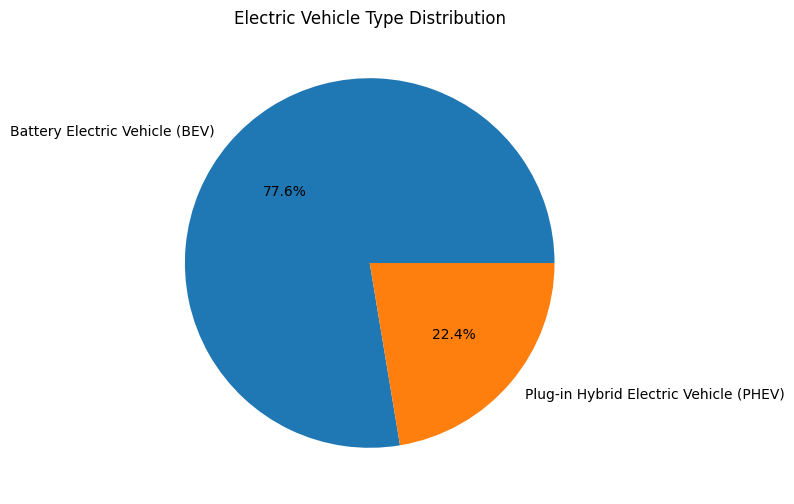

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(ev_by_type, labels=ev_by_type.index, autopct='%1.1f%%')
plt.title('Electric Vehicle Type Distribution')
plt.show()

In [ ]:
# prompt: donut chart for ev_by_type by plotly

import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=ev_by_type.index, values=ev_by_type.values, hole=.6)])
fig.update_layout(title_text="Electric Vehicle Type Distribution")
fig.show()


In [ ]:
Total_PHEV=df1[df1['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']['Electric Vehicle Type'].count()

In [ ]:
PHEV_per=round((Total_PHEV/Total_vehicle)*100,2)
PHEV_per

22.38

In [ ]:
df1['Model Year'].value_counts()

,count
Model Year,
2023,37079
2022,27799
2021,18684
2018,14441
2020,11294
2019,10717
2017,8574
2016,5650
2015,4934


In [ ]:
ev_by_model_year=df1.groupby('Model Year')['VIN (1-10)'].count()

### Total Vehicle by model year 2010 onwards

In [ ]:
ev_by_model_year_2010=ev_by_model_year.loc[2010:]

In [ ]:
# prompt: Generate interactive area chart with data labels on for ev_by_model_year_2010

import plotly.express as px

fig = px.area(ev_by_model_year_2010,
              labels={"value": "Total Vehicles", "index": "Model Year"},
              title="Total Vehicles by Model Year (2010 onwards)")
fig.show()


<Axes: xlabel='Model Year'>

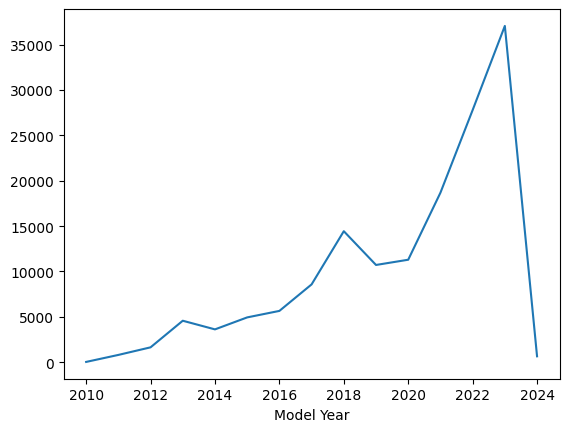

In [ ]:
sns.lineplot(x=ev_by_model_year_2010.index, y=ev_by_model_year_2010.values)

### Total Vehicle by State

In [ ]:
Top_10_states_by_ev=df1.groupby('State')['VIN (1-10)'].count().sort_values(ascending=False).head(10)
Top_10_states_by_ev

,VIN (1-10)
State,
WA,150141
CA,92
VA,35
MD,33
TX,20
NC,13
IL,12
AZ,11
CO,11


<Axes: xlabel='State'>

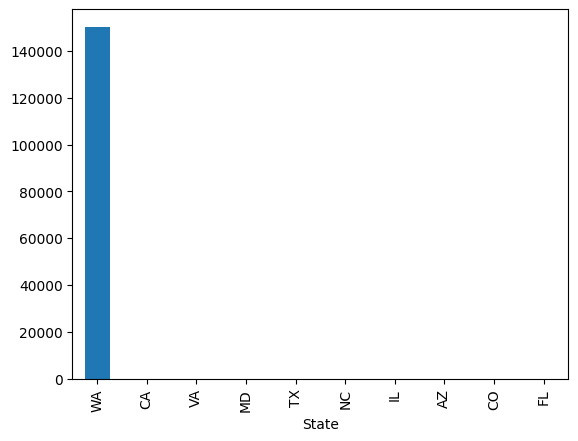

In [ ]:
Top_10_states_by_ev.plot(kind='bar')

In [ ]:
# prompt: use a map chart to display the above

import plotly.express as px

# Create a mapbox plot
fig = px.choropleth(
    Top_10_states_by_ev.reset_index(),
    locations="State",
    locationmode="USA-states",
    color="VIN (1-10)",
    scope="usa",
    color_continuous_scale="Viridis",
    title="Top 10 States by Electric Vehicle Count"
)

fig.show()


In [ ]:
ev_by_states=df1.groupby('State')['VIN (1-10)'].count().sort_values(ascending=False)
ev_by_states

,VIN (1-10)
State,
WA,150141
CA,92
VA,35
MD,33
TX,20
NC,13
IL,12
AZ,11
CO,11


In [ ]:

import plotly.express as px

# Create a mapbox plot
fig = px.choropleth(
    ev_by_states.reset_index(),
    locations="State",
    locationmode="USA-states",
    color="VIN (1-10)",
    scope="usa",
    color_continuous_scale="Viridis",
    title="Top 10 States by Electric Vehicle Count"
)

fig.show()


### Top 10 vehicles by make

In [ ]:
ev_by_make=df1['Make'].value_counts().head(10)
ev_by_make

,count
Make,
TESLA,68983
NISSAN,13497
CHEVROLET,12026
FORD,7614
BMW,6439
KIA,6198
TOYOTA,5223
VOLKSWAGEN,4074
VOLVO,3536


<Axes: xlabel='Make'>

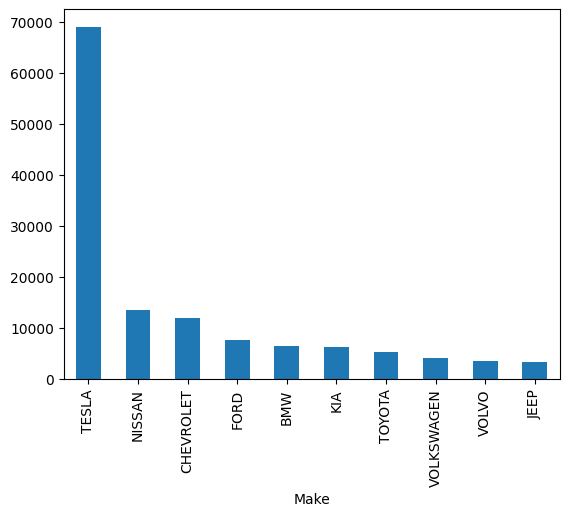

In [ ]:
ev_by_make.plot(kind='bar')

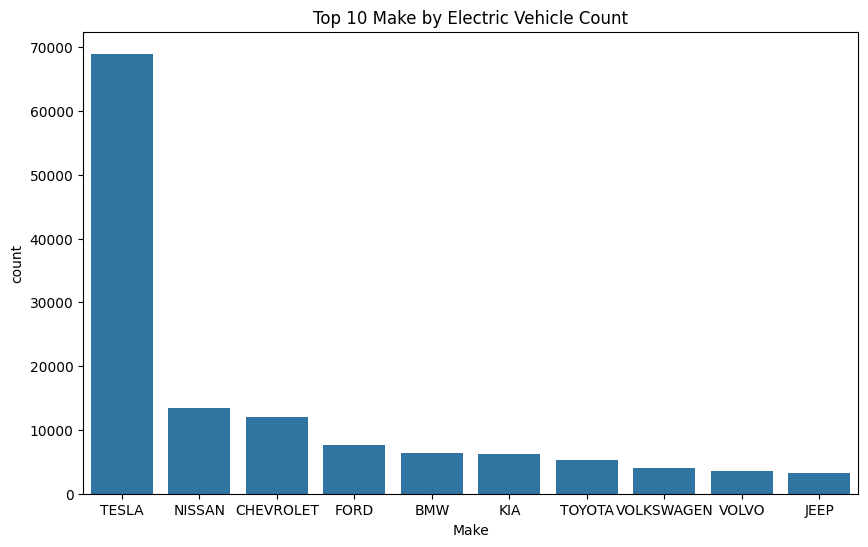

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(ev_by_make)
plt.title('Top 10 Make by Electric Vehicle Count')
plt.show()


In [ ]:
# prompt: Create a interactive horizontal barplot for ev_by_make

import plotly.express as px

fig = px.bar(ev_by_make,
              x=ev_by_make.values,
              y=ev_by_make.index,
              color=ev_by_make.values,
              orientation='h',
              title='Top 10 Make by Electric Vehicle Count')
fig.show()


### Total Vehicles by (CAFV) eligibility type

In [ ]:
ev_by_cafv=df1['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
ev_by_cafv

,count
Clean Alternative Fuel Vehicle (CAFV) Eligibility,
Eligibility unknown as battery range has not been researched,69698
Clean Alternative Fuel Vehicle Eligible,62951
Not eligible due to low battery range,17833


<Axes: ylabel='count'>

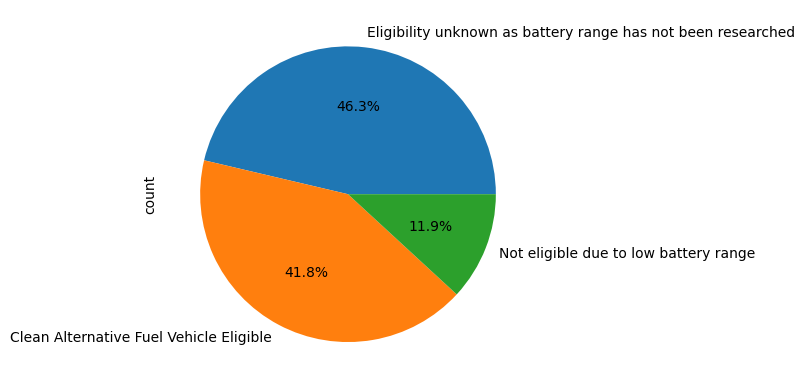

In [ ]:
ev_by_cafv.plot(kind='pie', autopct='%1.1f%%')

In [ ]:
# prompt: create a donut chart for the ev_by_cafv using plotly

import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(labels=ev_by_cafv.index,
                             values=ev_by_cafv.values,
                             hole=.6)])
fig.update_layout(title_text="Total Vehicles by (CAFV) eligibility type")
fig.show()


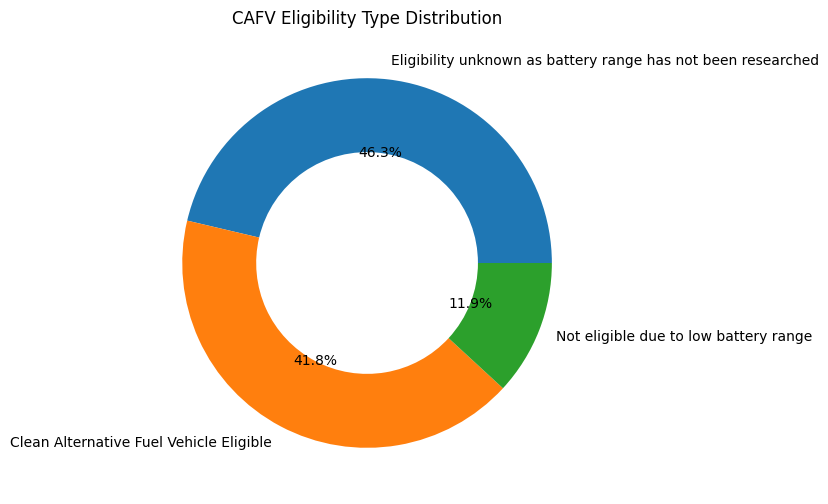

In [ ]:
# prompt: create a donut chart for the ev_by_cafv

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.pie(ev_by_cafv, labels=ev_by_cafv.index, autopct='%1.1f%%', wedgeprops=dict(width=0.4))
plt.title('CAFV Eligibility Type Distribution')
plt.show()


### Top 10 vehicles by Model

In [ ]:
ev_by_model_10=df1['Model'].value_counts().head(10)
ev_by_model_10

,count
Model,
MODEL Y,28502
MODEL 3,27709
LEAF,13187
MODEL S,7611
BOLT EV,5733
MODEL X,5114
VOLT,4890
ID.4,2999
NIRO,2876


In [ ]:
# prompt: generate an interactive tree plot using plotly for ev_by_model_10

import plotly.graph_objects as go

fig = go.Figure(go.Treemap(
    labels = ev_by_model_10.index,
    parents = [""] * len(ev_by_model_10),
    values = ev_by_model_10.values
))

fig.update_layout(title_text="Top 10 EV Models")
fig.show()
